# Data Augmentation

In [108]:
from imblearn.over_sampling import SMOTENC, ADASYN
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [109]:
file_path = "data/CRFs.csv"
data = pd.read_csv(file_path)
data = data.replace("n/a", np.nan).dropna()

In [110]:
def add_noise(series, noise_level):
    return series + np.random.normal(0, noise_level, size=series.shape)

In [111]:
data['SBP'] = add_noise(data['SBP'], 5) # 5mmHG
data['DBP'] = add_noise(data['DBP'], 3) # 3 mmHG
data['Weight'] = add_noise(data['Weight'], 1.5) # 1.5kg
data['Height'] = add_noise(data['Height'], 2) # 2cm

In [112]:
data['SBP'] = np.clip(data['SBP'], 90, 200)
data['DBP'] = np.clip(data['DBP'], 50, 120)
data['Weight'] = np.clip(data['Weight'], 30, 200)
data['Height'] = np.clip(data['Height'], 140, 200)

In [ ]:
data['Gender'] = data['Gender'].str.upper().map({'M': 0, 'F': 1})
data['Smoker'] = data['Smoker'].str.upper().map({'NO': 0, 'YES': 1})
data.head()

In [113]:
X = data[['Age', 'Weight', 'Height', 'SBP', 'DBP', 'Smoker', 'Gender']]
y = data['Vascular event']
smote = SMOTENC(sampling_strategy={'none':104, 'myocardial infarction': 104, 'stroke': 104, 'syncope': 104}, random_state=42, k_neighbors=2, categorical_features=['Gender', 'Smoker'])
X_resampled, y_resampled = smote.fit_resample(X, y)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_mask = lof.fit_predict(X_resampled) == 1  # 1 = inliers, -1 = outliers
X_smote_cleaned, y_smote_cleaned = X_resampled[outlier_mask], y_resampled[outlier_mask]
augmented_data = pd.DataFrame(X_resampled, columns=X.columns)
augmented_data['Vascular event'] = y_resampled

ValueError: could not convert string to float: 'yes'

In [106]:
print("Balanced class distribution:")
print(augmented_data['Vascular event'].value_counts())

Balanced class distribution:
Vascular event
none                     104
myocardial infarction    104
stroke                   104
syncope                  104
Name: count, dtype: int64


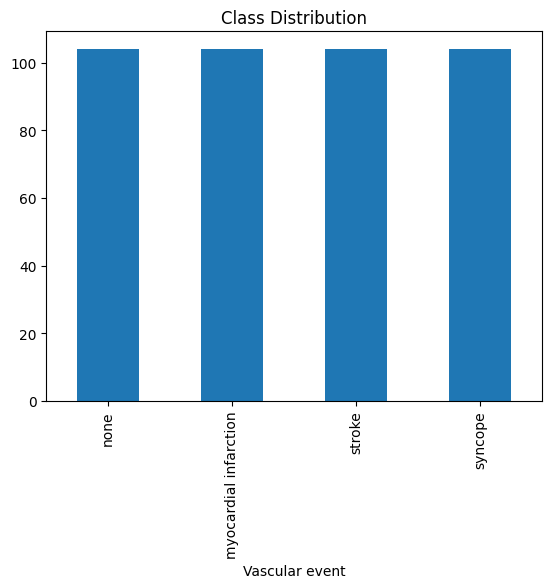

In [107]:
augmented_data['Vascular event'].value_counts().plot(kind='bar', title="Class Distribution")
plt.show()

In [104]:
augmented_data.to_csv("augmented_dataset.csv", index=False)
print("Augmented dataset saved to 'augmented_dataset.csv'")

Augmented dataset saved to 'augmented_dataset.csv'
